In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 資料讀取

In [2]:
#讀取資料
train_data = pd.read_csv('C:/Users/admin/Documents/PythonMLDL/competitive-data-science-predict-future-sales/sales_train_v2.csv')
item_data = pd.read_csv('C:/Users/admin/Documents/PythonMLDL/competitive-data-science-predict-future-sales/items.csv')
shops = pd.read_csv('C:/Users/admin/Documents/PythonMLDL/competitive-data-science-predict-future-sales/shops.csv')
cats = pd.read_csv('C:/Users/admin/Documents/PythonMLDL/competitive-data-science-predict-future-sales/item_categories.csv')

# 資料探索

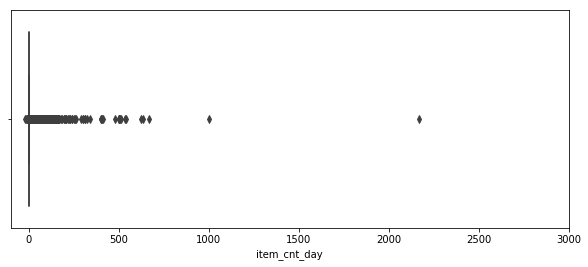

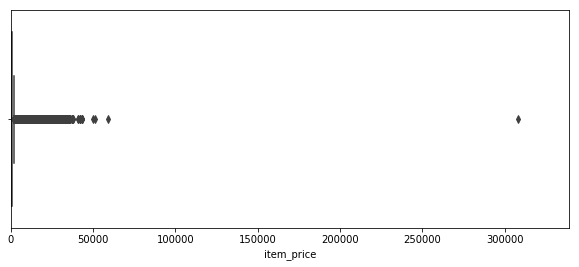

In [7]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train_data.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(train_data.item_price.min(), train_data.item_price.max()*1.1)
sns.boxplot(x=train_data.item_price) #以箱型圖查看每日銷售及商品價格的分布概況 

In [5]:
train_data[train_data.item_cnt_day > 1000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [6]:
train_data[train_data.item_price > 100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


* 在shop_id=12, item_id=11373，該產品單日售出2169項
* 在shop_id=12, item_id=6066，該產品單價為307980
* (這兩筆有可能是outlier，但先不排除，若是之後模型預測的結果不佳，再考慮是否要排除outlier)

In [12]:
train_data[train_data.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


在shop_id=32, item_id=2973，該產品單價為-1(不合理)

# 資料前處理

In [7]:
#時間的格式為日/月/年
train_data['date'] = pd.to_datetime(train_data['date'], format='%d.%m.%Y')

In [8]:
train_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [9]:
#確認資料型別，date欄位為datetime格式
train_data.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

In [10]:
item_data.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [11]:
train_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [12]:
data_sales = pd.merge(train_data, item_data, on = 'item_id')

In [13]:
data_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,2013-01-23,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,2013-01-20,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,2013-01-02,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,2013-01-03,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [14]:
data_sales.shape

(2935849, 8)

# 資料格式整理

In [15]:
data_sales_sorted = data_sales.sort_values(by = ['date','shop_id','item_id'])
data_sales_sorted = data_sales_sorted.reset_index(drop=True)
data_sales_sorted.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-01-01,0,2,991,99.0,1.0,"3D Action Puzzle ""Динозавры"" Тиранозавр",67
1,2013-01-01,0,2,1472,2599.0,1.0,"Assassin's Creed 3 [Xbox 360, русская версия]",23
2,2013-01-01,0,2,1905,249.0,1.0,"Bestseller. Grand Theft Auto: San Andreas [PC,...",30
3,2013-01-01,0,2,2920,599.0,2.0,Disney. LEGO Пираты Карибского моря (Essential...,21
4,2013-01-01,0,2,3320,1999.0,1.0,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...",19


In [16]:
data_sales_sorted['date'].min()

Timestamp('2013-01-01 00:00:00')

In [17]:
data_sales_sorted.shape

(2935849, 8)

將資料中 shop_id 和 item_id 中所有可能的組合抓出來

In [18]:
shop_item = data_sales_sorted[['shop_id','item_id']]

In [19]:
shop_item.head()

,shop_id,item_id
0,2,991
1,2,1472
2,2,1905
3,2,2920
4,2,3320


In [20]:
shop_item.shape

(2935849, 2)

In [21]:
#將重複的排列組合刪掉
shop_item.drop_duplicates(inplace = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
shop_item.shape #有424124的組合

(424124, 2)

In [23]:
shop_item_array = shop_item.values #轉array

In [24]:
shop_item_array

array([[    2,   991],
       [    2,  1472],
       [    2,  1905],
       ...,
       [   59, 15411],
       [   59, 17755],
       [   59, 17774]], dtype=int64)

In [25]:
shop_item_array.shape

(424124, 2)

In [26]:
type(shop_item_array)

numpy.ndarray

In [27]:
shop_item_array = shop_item_array.astype(np.float)

In [28]:
shop_item_array[:,1] = (shop_item_array[:,1] +(shop_item_array[:,0] *0.001)) #用 itemID + 0.001倍的shopID  當作待會索引該資料是排列組合中第幾個index的索引

In [29]:
shop_item_array.dtype

dtype('float64')

In [30]:
shop_item_array

array([[2.0000000e+00, 9.9100200e+02],
       [2.0000000e+00, 1.4720020e+03],
       [2.0000000e+00, 1.9050020e+03],
       ...,
       [5.9000000e+01, 1.5411059e+04],
       [5.9000000e+01, 1.7755059e+04],
       [5.9000000e+01, 1.7774059e+04]])

In [31]:
shop_item_array = shop_item_array[:,1]

In [32]:
shop_item.head()

,shop_id,item_id
0,2,991
1,2,1472
2,2,1905
3,2,2920
4,2,3320


In [33]:
shop_item = shop_item.reset_index()
shop_item = shop_item.drop(columns=['index'])
shop_item.head()

,shop_id,item_id
0,2,991
1,2,1472
2,2,1905
3,2,2920
4,2,3320


## input檔案格式解釋：

第一列：
shop_id = 2, item_id = 991 在 2013 年 1 月，每一天的銷售量 (長度為31) 


第二列：
shop_id = 2, item_id = 1472 在 2013 年 1 月，每一天的銷售量 (長度為31) 
...
...


以此類推，每個月有  每一間商店每一項商品(424124) 在這個月每天賣出的資料  

故training data大小為: (424124(排列組合)*31(個月) )   乘    31 (一個月都抓31天)

而對應的 y_train 則是該 shop 該 item 的下一個月的總銷售量

### X_train

In [34]:
X_train = np.zeros((shop_item.shape[0]*31, 31)) #row數量:一種排列組合有31個月的資料 ，column數量:每個月都預設31天
X_train.shape

(13147844, 31)

In [35]:
X_train_left = pd.concat([shop_item]*31, ignore_index=True,axis=0) # Ignores the index

In [36]:
X_train_left_array = X_train_left.values

In [37]:
X_train_left.head()

,shop_id,item_id
0,2,991
1,2,1472
2,2,1905
3,2,2920
4,2,3320


In [38]:
X_train_left_array.shape

(13147844, 2)

In [39]:
#X_train_1 = pd.concat([X_train_left, pd.DataFrame(X_train)],axis=1)

In [40]:
#用X_train 去做

In [41]:
type(X_train)
X_train.shape

(13147844, 31)

In [42]:
data_sales_sorted.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-01-01,0,2,991,99.0,1.0,"3D Action Puzzle ""Динозавры"" Тиранозавр",67
1,2013-01-01,0,2,1472,2599.0,1.0,"Assassin's Creed 3 [Xbox 360, русская версия]",23
2,2013-01-01,0,2,1905,249.0,1.0,"Bestseller. Grand Theft Auto: San Andreas [PC,...",30
3,2013-01-01,0,2,2920,599.0,2.0,Disney. LEGO Пираты Карибского моря (Essential...,21
4,2013-01-01,0,2,3320,1999.0,1.0,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...",19


In [43]:
data_sales_sorted['day'] = data_sales_sorted['date'].dt.day
data_sales_sorted['month'] = data_sales_sorted['date'].dt.month
data_sales_sorted['year'] = data_sales_sorted['date'].dt.year


In [44]:
data_sales_sorted_array = data_sales_sorted.values

In [45]:
type(data_sales_sorted_array)

numpy.ndarray

In [46]:
data_sales_sorted_array[:,3] = data_sales_sorted_array[:,3] +(data_sales_sorted_array[:,2] *0.001) #當作索引的東東

In [47]:
data_sales_sorted_array[:,3] #3是我要搜尋第幾個排列組合的索引 參看 排列組合那個array

array([991.002, 1472.002, 1905.002, ..., 20949.059, 21369.059, 21449.059],
      dtype=object)

In [48]:
data_sales_sorted_array.shape

(2935849, 11)

In [49]:
data_sales_sorted.shape

(2935849, 11)

In [50]:
data_sales_sorted.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,day,month,year
0,2013-01-01,0,2,991,99.0,1.0,"3D Action Puzzle ""Динозавры"" Тиранозавр",67,1,1,2013
1,2013-01-01,0,2,1472,2599.0,1.0,"Assassin's Creed 3 [Xbox 360, русская версия]",23,1,1,2013
2,2013-01-01,0,2,1905,249.0,1.0,"Bestseller. Grand Theft Auto: San Andreas [PC,...",30,1,1,2013
3,2013-01-01,0,2,2920,599.0,2.0,Disney. LEGO Пираты Карибского моря (Essential...,21,1,1,2013
4,2013-01-01,0,2,3320,1999.0,1.0,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...",19,1,1,2013


In [51]:
#原諒我沒再去改了XDDD，反正把這個迴圈跑到不能跑後，X_train就是我們的input了^____^(前31個月)
for i in range(data_sales_sorted.shape[0]): #data_sales_sorted.shape[0]
    m_id =(data_sales_sorted_array[i,9])+(((data_sales_sorted_array[i,10])-2013)*12) #從1編號 ，(1-31) ，訓練資料共31個月
    d_id = data_sales_sorted_array[i,8] #從1編號，(1-31)
    #y_id = data_sales_sorted['date'][i].year-2012 #從1編號 ，(1-3)  表示2013 2014 2015

    #c_id 紀載這筆資料的商店跟商品組合 是 排列組合中的第幾個
    c_id = np.where(shop_item_array == data_sales_sorted_array[i,3] )[0][0]#從0編號 ，(0-424123)  ，有424124種排列
    X_train[((m_id-1)*424124)+c_id][(d_id-1)]=data_sales_sorted['item_cnt_day'][i]
    if(i%5000==0):
        print(i)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
690000
695000
700000
705000
710000
715000
720000
725000
730

IndexError: index 13554306 is out of bounds for axis 0 with size 13147844

In [52]:
print(X_train[:20,:])

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2. -1.  0.  0.  1.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  

In [53]:
myinfp_array = np.concatenate(( X_train_left_array,X_train), axis=1)

In [54]:
myinfp_array = myinfp_array.astype(np.int)

In [55]:
myinfp_array[:20,:]  #前兩column 是店家、商品id 後面31column是 該月的每天銷售量

array([[    2,   991,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    2,  1472,     1,     0,     0,     0,     0,     1,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    2,  1905,     1,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     1,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    2,  2920,     2,    -1,     0,     0,     1,     2,     0,
            1,     0,     0,     0,     0,     0,     0,     0,     0,
            1,     0,     0,     0,     0,     0,     0,     0,   

In [56]:
X_train_1 = pd.DataFrame(myinfp_array)

In [57]:
X_train_1.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2,991,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1472,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,1905,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2920,2,-1,0,0,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,3320,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#儲存結果以利之後分析直接讀此檔案就可以使用
X_train_1.to_csv('C:/Users/admin/Documents/PythonMLDL/X_train/X_train.csv',index=0)

### X_test

In [58]:
X_test = np.zeros((shop_item.shape[0]*3, 31)) #row數量:一種排列組合有31個月的資料 ，column數量:每個月都預設31天
X_test.shape

(1272372, 31)

In [59]:
X_test_left = pd.concat([shop_item]*3, ignore_index=True,axis=0) # Ignores the index

In [60]:
X_test_left_array = X_test_left.values

In [61]:
X_test_left.head()

,shop_id,item_id
0,2,991
1,2,1472
2,2,1905
3,2,2920
4,2,3320


In [62]:
X_test_left_array.shape

(1272372, 2)

In [63]:
type(X_test)
X_test.shape

(1272372, 31)

In [64]:
for i in range(2774718,data_sales_sorted.shape[0]): #data_sales_sorted.shape[0]
    m_id =(data_sales_sorted_array[i,9]-7)+(((data_sales_sorted_array[i,10])-2015)*12) #從1編號 ，(1-3) ，測試資料共3個月(從2015年8月開始)
    d_id = data_sales_sorted_array[i,8] #從1編號，(1-31)
    #y_id = data_sales_sorted['date'][i].year-2012 #從1編號 ，(1-3)  表示2013 2014 2015

    #c_id 紀載這筆資料的商店跟商品組合 是 排列組合中的第幾個
    c_id = np.where(shop_item_array == data_sales_sorted_array[i,3] )[0][0]#從0編號 ，(0-424123)  ，有424124種排列
    X_test[((m_id-1)*424124)+c_id][(d_id-1)]=data_sales_sorted['item_cnt_day'][i]
    if(i%5000==0):
        print(i)

2775000
2780000
2785000
2790000
2795000
2800000
2805000
2810000
2815000
2820000
2825000
2830000
2835000
2840000
2845000
2850000
2855000
2860000
2865000
2870000
2875000
2880000
2885000
2890000
2895000
2900000
2905000
2910000
2915000
2920000
2925000
2930000
2935000


In [45]:
print(X_test[30:50,:])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 2. 0. 0. 2. 1. 1. 0. 0. 0. 0. 1. 1. 1.
  1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 

In [65]:
myinfp_array = np.concatenate((X_test_left_array,X_test), axis=1)

In [66]:
myinfp_array = myinfp_array.astype(np.int)

In [67]:
myinfp_array[:50,:]

array([[   2,  991,    0, ...,    0,    0,    0],
       [   2, 1472,    0, ...,    0,    0,    0],
       [   2, 1905,    0, ...,    0,    0,    0],
       ...,
       [   7, 4425,    0, ...,    0,    0,    0],
       [   7, 4446,    0, ...,    0,    0,    0],
       [   7, 4462,    0, ...,    0,    0,    0]])

In [68]:
X_test_1 = pd.DataFrame(myinfp_array)

In [50]:
X_test_1.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2,991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1472,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1905,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2920,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3320,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X_test_1.to_csv('C:/Users/admin/Documents/PythonMLDL/X_train/X_test.csv',index=0)

In [ ]:
#X_train_1.to_csv('trainingData_780001_1000000.csv')

### Y_train & Y_test

利用前面所整理的X_train和X_test，計算每間商店的每項產品的每月商品銷售總量

In [69]:
AddMonthSale_Xtrain = pd.DataFrame(X_train)

In [70]:
AddMonthSale_Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,-1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
Xtrain_MonthSale = AddMonthSale_Xtrain.iloc[:,].sum(axis=1)

In [72]:
Xtrain_MonthSale.head()

0    1.0
1    3.0
2    3.0
3    6.0
4    4.0
dtype: float64

In [73]:
Xrain_MonthSale = pd.DataFrame(Xtrain_MonthSale)

In [74]:
AddMonthSale_Xtest = pd.DataFrame(X_test)

In [75]:
Xtest_MonthSale = AddMonthSale_Xtest.iloc[:,].sum(axis=1)

In [76]:
Xtest_MonthSale = pd.DataFrame(Xtest_MonthSale)

In [77]:
Xtest_MonthSale.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [89]:
# 編號 1 ~ 31月(若月的編號是從0~33)的月總銷售量 作為 Y_train
Y_train = pd.concat([Xtrain_MonthSale[424124:], Xtest_MonthSale[:424124]], axis = 0)

In [90]:
len(Y_train)

13147844

In [101]:
Y_train = pd.DataFrame(Y_train)

In [108]:
#len(X_train_left)

13147844

In [154]:
Y_train.to_csv('C:/Users/admin/Documents/PythonMLDL/X_train/Y_train.csv', index=0)

In [91]:
# 編號 32 ~ 33月(若月的編號是從0~33)的月總銷售量 作為 Y_test
Y_test = Xtest_MonthSale[424124:]

In [92]:
len(Y_test)

848248

In [113]:
Y_test.to_csv('C:/Users/admin/Documents/PythonMLDL/X_train/Y_test.csv', index=0)